# **Analysis of Shopping Cart Data**

This project seeks to apply Data Analysis skills to a shopping cart dataset and draw several cruicial insights from it.

There are several deductions and analyses that can be drawn from this data.

Including:

1. Which products were sold the most in the last month?
2. How have sales and revenue changed over the past few quarters?
3. Understanding Customer demographics and their preferences





In [460]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


### Loading the Dataset

In [461]:
customers=pd.read_csv('C:/Users/_DELL_/Desktop/Analysis-of-Shopping-Cart-Data/Analysis of Shopping Cart/Data/customers.csv', usecols=lambda column: not column.startswith('Unnamed'))
orders=pd.read_csv('C:/Users/_DELL_/Desktop/Analysis-of-Shopping-Cart-Data/Analysis of Shopping Cart/Data/orders.csv', usecols=lambda column: not column.startswith('Unnamed'))
products=pd.read_csv('C:/Users/_DELL_/Desktop/Analysis-of-Shopping-Cart-Data/Analysis of Shopping Cart/Data/products.csv', usecols=lambda column: not column.startswith('Unnamed'))
sales=pd.read_csv('C:/Users/_DELL_/Desktop/Analysis-of-Shopping-Cart-Data/Analysis of Shopping Cart/Data/sales.csv', usecols=lambda column: not column.startswith('Unnamed'))

In [462]:
customers.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [463]:
orders.head(10)

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,8/30/2021,9/24/2021
1,2,473,50490,2/3/2021,2/13/2021
2,3,774,46763,10/8/2021,11/3/2021
3,4,433,39782,5/6/2021,5/19/2021
4,5,441,14719,3/23/2021,3/24/2021
5,6,800,16197,9/9/2021,10/5/2021
6,7,626,37666,4/5/2021,4/11/2021
7,8,58,28484,4/12/2021,5/1/2021
8,9,852,12896,5/1/2021,5/11/2021
9,10,659,21922,10/15/2021,10/16/2021


In [464]:
sales.head(10)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339
5,5,1,981,106,3,318
6,6,2,915,96,1,96
7,7,2,686,113,1,113
8,8,2,1091,115,3,345
9,9,2,1196,105,1,105


In [465]:
products.head(10)

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
5,5,Shirt,Oxford Cloth,XS,orange,114,45,"A orange coloured, XS sized, Oxford Cloth Shirt"
6,6,Shirt,Oxford Cloth,S,orange,114,72,"A orange coloured, S sized, Oxford Cloth Shirt"
7,7,Shirt,Oxford Cloth,M,orange,114,77,"A orange coloured, M sized, Oxford Cloth Shirt"
8,8,Shirt,Oxford Cloth,L,orange,114,48,"A orange coloured, L sized, Oxford Cloth Shirt"
9,9,Shirt,Oxford Cloth,XL,orange,114,43,"A orange coloured, XL sized, Oxford Cloth Shirt"


## Merging data
Let's merge customers, orders, and product data to form one file since it's have the same rows.

In [466]:
# merge customers and orders
customer_order=pd.merge(customers, orders, on='customer_id', how='inner')
# merge the result and sales
cop_data=pd.merge(customer_order, sales, on='order_id', how='inner')

In [467]:
cop_data.tail()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,payment,order_date,delivery_date,sales_id,product_id,price_per_unit,quantity,total_price
4995,1000,Mandel Fairbanks,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,894,35622,10/11/2021,10/13/2021,4478,1117,115,3,345
4996,1000,Mandel Fairbanks,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,894,35622,10/11/2021,10/13/2021,4479,1070,93,3,279
4997,1000,Mandel Fairbanks,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,894,35622,10/11/2021,10/13/2021,4480,1177,99,2,198
4998,1000,Mandel Fairbanks,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,894,35622,10/11/2021,10/13/2021,4481,1239,112,1,112
4999,1000,Mandel Fairbanks,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,894,35622,10/11/2021,10/13/2021,4482,109,92,3,276


## Brief Info about Dataset

In [468]:
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     5000 non-null   int64 
 1   customer_name   5000 non-null   object
 2   gender          5000 non-null   object
 3   age             5000 non-null   int64 
 4   home_address    5000 non-null   object
 5   zip_code        5000 non-null   int64 
 6   city            5000 non-null   object
 7   state           5000 non-null   object
 8   country         5000 non-null   object
 9   order_id        5000 non-null   int64 
 10  payment         5000 non-null   int64 
 11  order_date      5000 non-null   object
 12  delivery_date   5000 non-null   object
 13  sales_id        5000 non-null   int64 
 14  product_id      5000 non-null   int64 
 15  price_per_unit  5000 non-null   int64 
 16  quantity        5000 non-null   int64 
 17  total_price     5000 non-null   int64 
dtypes: int64

In [469]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


## Checking for Missing values

In [470]:
cop_data.isna().sum()

customer_id       0
customer_name     0
gender            0
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
order_id          0
payment           0
order_date        0
delivery_date     0
sales_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [471]:
sales.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

## Checking Categorical Variables

In [472]:
#number of different values ​​in category field
categorical=cop_data.select_dtypes(["category","object"]).columns
for cat_col in categorical:
  print(f"{cat_col}:{cop_data[cat_col].nunique()} unique variables(s)")

customer_name:616 unique variables(s)
gender:8 unique variables(s)
home_address:616 unique variables(s)
city:604 unique variables(s)
state:8 unique variables(s)
country:1 unique variables(s)
order_date:291 unique variables(s)
delivery_date:304 unique variables(s)


## Checking Discrete and Continuous Variables
Let's have a look at Discrete and Continuous variables.

In [473]:
# number of different values ​​in sales field
numberic=sales.select_dtypes(["int", "float"]).columns
for num_col in numberic:
  print(f"{num_col}:{sales[num_col].nunique()} uniqueness variable(s)")

sales_id:5000 uniqueness variable(s)
order_id:993 uniqueness variable(s)
product_id:1233 uniqueness variable(s)
price_per_unit:23 uniqueness variable(s)
quantity:3 uniqueness variable(s)
total_price:69 uniqueness variable(s)


In [474]:
cop_data.dtypes

customer_id        int64
customer_name     object
gender            object
age                int64
home_address      object
zip_code           int64
city              object
state             object
country           object
order_id           int64
payment            int64
order_date        object
delivery_date     object
sales_id           int64
product_id         int64
price_per_unit     int64
quantity           int64
total_price        int64
dtype: object

## Recap of Dataset.
These are some point that we have.

1. Costumer, Order, and Products Data:
2. We have total  1000  rows and  22  columns
3. There's no missing value(s)
4. customer_name :  1000  uniqueness variable(s)
5. gender :  8  uniqueness variable(s)
6. home_address :  1000  uniqueness variable(s)
7. city :  604  uniqueness variable(s)
8. state :  8  uniqueness variable(s)
9. country :  1  uniqueness variable(s)
10. order_date :  291  uniqueness variable(s)
11. delivery_date :  304  uniqueness variable(s)
12. product_type :  3  uniqueness variable(s)
13. product_name :  28  uniqueness variable(s)
15. size :  5  uniqueness variable(s)
16. colour :  7  uniqueness variable(s)
17. description :  1000  uniqueness variable(s)

## Sales Data:
1. There's no missing value(s)
2. It's not have a uniqueness value(s)
3. All data type in these data is Int 64


Next, we will try to do some exploration and visualization. But we need to do some Data Preparation first.

## **Data Preparation**

## Convert Order Date column

In [475]:
#convert it using to_datetime() function
cop_data["order_date"], cop_data["delivery_date"]=pd.to_datetime(cop_data["order_date"]), pd.to_datetime(cop_data["delivery_date"])
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     5000 non-null   int64         
 1   customer_name   5000 non-null   object        
 2   gender          5000 non-null   object        
 3   age             5000 non-null   int64         
 4   home_address    5000 non-null   object        
 5   zip_code        5000 non-null   int64         
 6   city            5000 non-null   object        
 7   state           5000 non-null   object        
 8   country         5000 non-null   object        
 9   order_id        5000 non-null   int64         
 10  payment         5000 non-null   int64         
 11  order_date      5000 non-null   datetime64[ns]
 12  delivery_date   5000 non-null   datetime64[ns]
 13  sales_id        5000 non-null   int64         
 14  product_id      5000 non-null   int64         
 15  pric

### Add order year, month and day to cop_data.

In [476]:
#year
cop_data["order_year"]=cop_data["order_date"].dt.year
#month
cop_data["order_month"]=cop_data["order_date"].dt.month
#dat
cop_data["order_day"]=cop_data['order_date'].dt.day

### Add delivery year, month and day to cop_data.

In [477]:
#year
cop_data["delivery_year"]=cop_data["delivery_date"].dt.year
#month
cop_data["delivery_month"]=cop_data["delivery_date"].dt.month
#day
cop_data["delivery_day"]=cop_data["delivery_date"].dt.day

## **Data Analysis and Visualization (EDA)**

### Correlation Between and among the cop_data

In [478]:
# remove all columns without numeric type
cop_data_copy=cop_data
numeric=cop_data_copy.select_dtypes(include=[float, int])

In [479]:
numeric.corr()

,customer_id,age,zip_code,order_id,payment,sales_id,product_id,price_per_unit,quantity,total_price,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day
customer_id,1.000000,-0.028484,0.004816,-0.015749,-0.015179,-0.015520,-0.014617,0.018243,0.014590,0.018069,NaN,-0.027020,-0.016545,NaN,-0.022497,-0.009508
age,-0.028484,1.000000,-0.009591,-0.030262,0.017305,-0.030181,-0.005061,0.012690,0.022322,0.023692,NaN,0.018141,-0.069985,NaN,0.012295,-0.035924
zip_code,0.004816,-0.009591,1.000000,-0.072293,0.006845,-0.072512,0.016309,-0.016110,0.017419,0.010970,NaN,0.034423,0.020548,NaN,0.031796,0.016860
order_id,-0.015749,-0.030262,-0.072293,1.000000,0.008699,0.999953,-0.001160,-0.001667,0.012749,0.011283,NaN,-0.003230,0.008731,NaN,0.006907,-0.045723
payment,-0.015179,0.017305,0.006845,0.008699,1.000000,0.008762,-0.005194,0.010412,0.011697,0.013233,NaN,0.012731,-0.014402,NaN,0.008752,-0.027987
sales_id,-0.015520,-0.030181,-0.072512,0.999953,0.008762,1.000000,-0.001371,-0.001624,0.012686,0.011228,NaN,-0.003281,0.008655,NaN,0.006871,-0.046492
product_id,-0.014617,-0.005061,0.016309,-0.001160,-0.005194,-0.001371,1.000000,0.022051,0.009468,0.013958,NaN,-0.011744,0.012870,NaN,-0.008843,0.002195
price_per_unit,0.018243,0.012690,-0.016110,-0.001667,0.010412,-0.001624,0.022051,1.000000,0.019318,0.232178,NaN,-0.018518,0.006207,NaN,-0.020787,0.043990
quantity,0.014590,0.022322,0.017419,0.012749,0.011697,0.012686,0.009468,0.019318,1.000000,0.973141,NaN,0.023615,-0.039649,NaN,0.019913,0.018968
total_price,0.018069,0.023692,0.010970,0.011283,0.013233,0.011228,0.013958,0.232178,0.973141,1.000000,NaN,0.018208,-0.036477,NaN,0.014361,0.026694


The correlation value is between -1 and 1, the closer the values to either 1 or -1, the higher the correlation. Exactly 1 or -1 represents perfect correlation. 0 represents no correlation.

Text(0.5, 1.0, 'Cop data correlation')

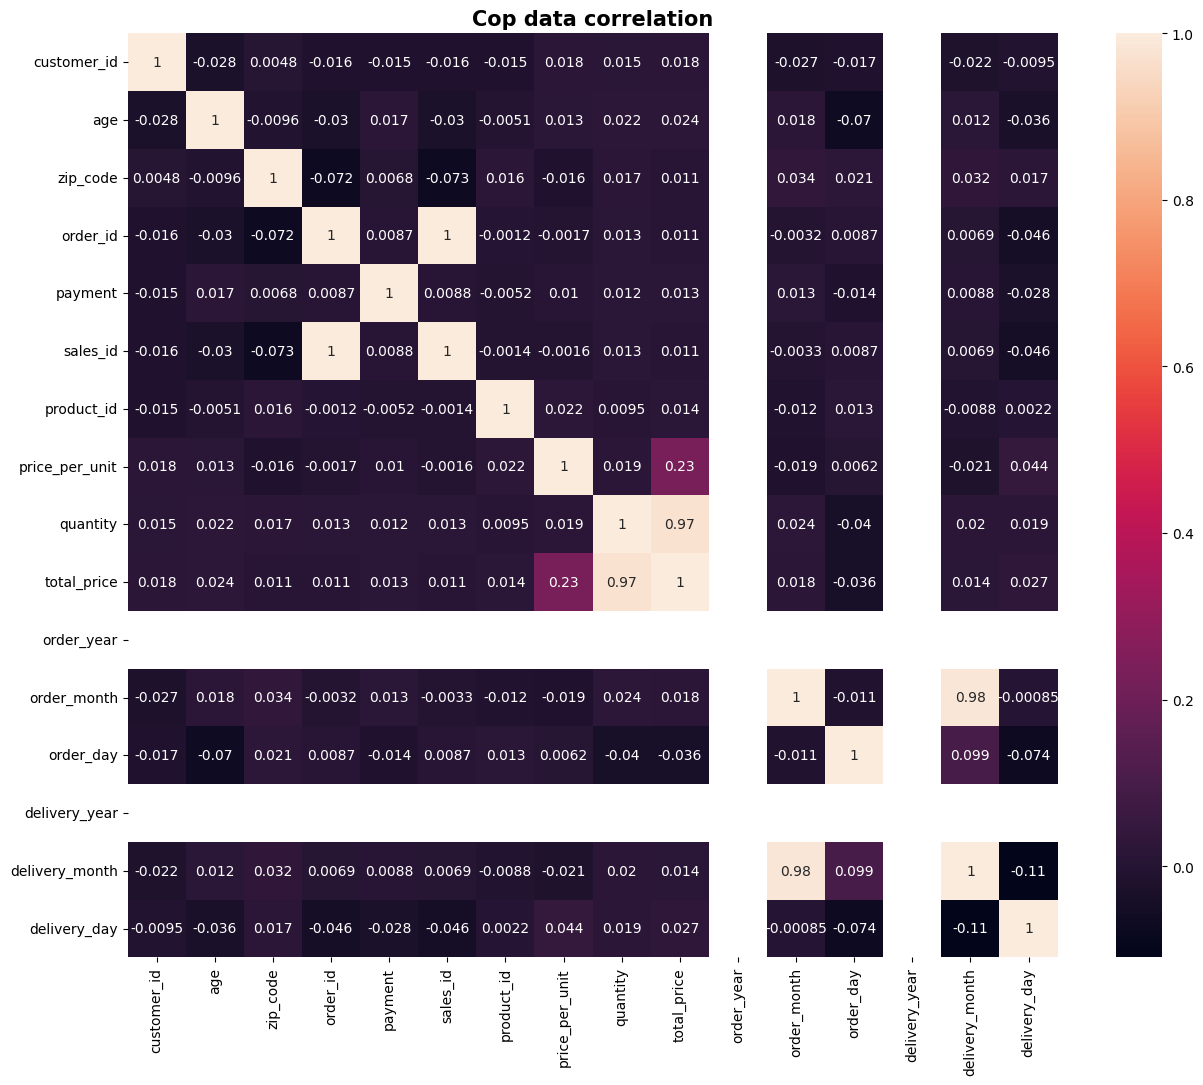

In [480]:
#create a heatmap for 'cop_data'
plt.figure(figsize=(15,12))
sns.heatmap(numeric.corr(), annot=True)
plt.title("Cop data correlation", weight="bold", fontsize=15)

## *Sales* and Price are highly correlated meaning one affects the other. If the price is high, sales will go down and vice-versa.

Text(0.5, 1.0, 'Sales correclation')

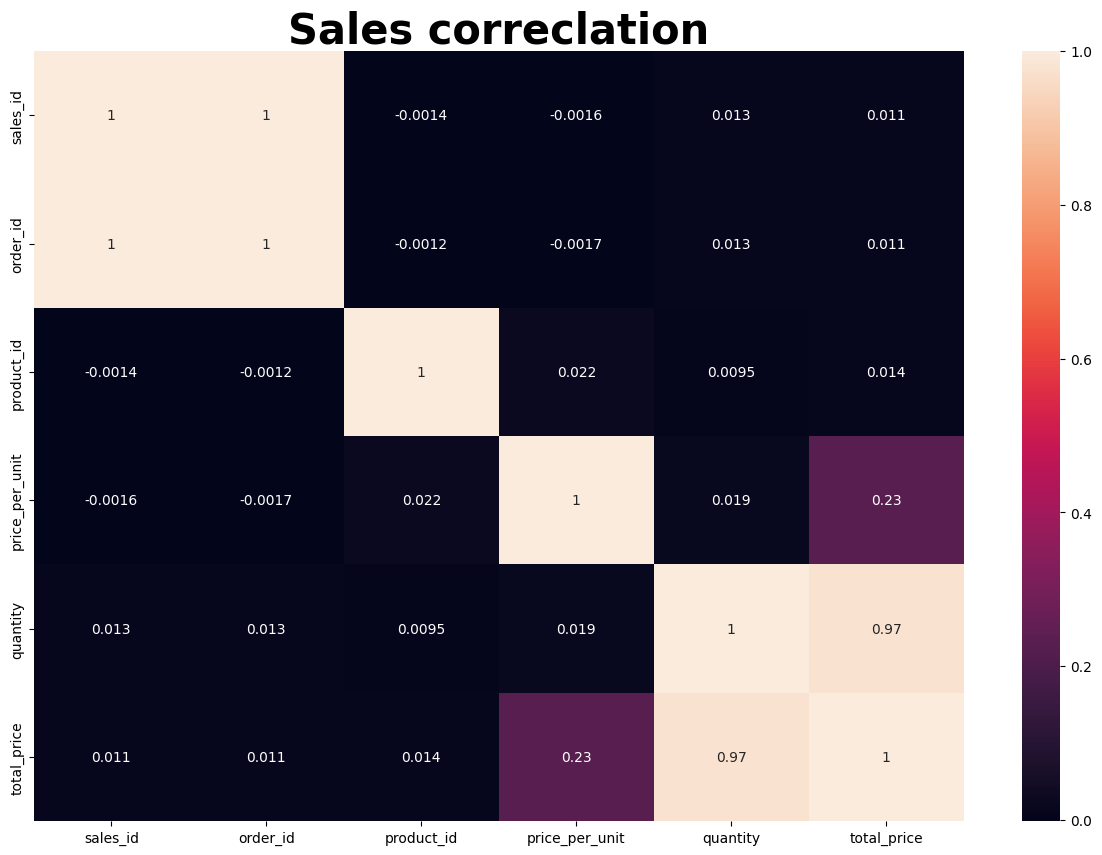

In [481]:
#create a heatmap for 'sales'
plt.figure(figsize=(15,10))
sns.heatmap(sales.corr(),annot=True)
plt.title("Sales correclation", weight="bold", fontsize=30)


### The Five Number Summary of the data

In [482]:
numeric.describe(include=[np.number])

,customer_id,age,zip_code,order_id,payment,sales_id,product_id,price_per_unit,quantity,total_price,order_year,order_month,order_day,delivery_year,delivery_month,delivery_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.00000
mean,504.563000,48.760400,4912.355600,503.038200,33976.785000,2499.500000,634.053200,103.501600,1.99240,206.360000,2021.0,5.300000,15.738600,2021.0,5.771800,15.38480
std,276.504896,17.577519,2907.367939,285.964418,14612.706539,1443.520003,363.255794,9.195004,0.80751,86.357457,0.0,2.847037,8.546817,0.0,2.890293,8.62784
min,1.000000,20.000000,52.000000,1.000000,10043.000000,0.000000,1.000000,90.000000,1.00000,90.000000,2021.0,1.000000,1.000000,2021.0,1.000000,1.00000
25%,276.000000,34.000000,2273.000000,258.000000,20627.000000,1249.750000,323.000000,95.000000,1.00000,112.000000,2021.0,3.000000,8.000000,2021.0,3.000000,8.00000
50%,509.000000,48.000000,4750.000000,504.500000,34259.000000,2499.500000,635.000000,102.000000,2.00000,204.000000,2021.0,5.000000,16.000000,2021.0,6.000000,15.00000
75%,733.000000,63.000000,7460.250000,749.000000,46608.000000,3749.250000,951.000000,112.000000,3.00000,285.000000,2021.0,8.000000,23.000000,2021.0,8.000000,23.00000
max,1000.000000,80.000000,9998.000000,999.000000,59910.000000,4999.000000,1259.000000,119.000000,3.00000,357.000000,2021.0,10.000000,31.000000,2021.0,11.000000,31.00000


In [483]:
numeric.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
customer_id,5000.0,504.5630,276.504896,1.0,276.00,509.0,733.00,1000.0
age,5000.0,48.7604,17.577519,20.0,34.00,48.0,63.00,80.0
zip_code,5000.0,4912.3556,2907.367939,52.0,2273.00,4750.0,7460.25,9998.0
order_id,5000.0,503.0382,285.964418,1.0,258.00,504.5,749.00,999.0
payment,5000.0,33976.7850,14612.706539,10043.0,20627.00,34259.0,46608.00,59910.0
sales_id,5000.0,2499.5000,1443.520003,0.0,1249.75,2499.5,3749.25,4999.0
product_id,5000.0,634.0532,363.255794,1.0,323.00,635.0,951.00,1259.0
price_per_unit,5000.0,103.5016,9.195004,90.0,95.00,102.0,112.00,119.0
quantity,5000.0,1.9924,0.807510,1.0,1.00,2.0,3.00,3.0
total_price,5000.0,206.3600,86.357457,90.0,112.00,204.0,285.00,357.0


In [484]:
sales.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
sales_id,5000.0,2499.5000,1443.520003,0.0,1249.75,2499.5,3749.25,4999.0
order_id,5000.0,503.0382,285.964418,1.0,258.00,504.5,749.00,999.0
product_id,5000.0,634.0532,363.255794,1.0,323.00,635.0,951.00,1259.0
price_per_unit,5000.0,103.5016,9.195004,90.0,95.00,102.0,112.00,119.0
quantity,5000.0,1.9924,0.807510,1.0,1.00,2.0,3.00,3.0
total_price,5000.0,206.3600,86.357457,90.0,112.00,204.0,285.00,357.0


## Univariate Data Analysis

In [485]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2,
        nrows=1,
        figsize=(20, 6)
    )

#TO CREATE 2 PLOTS BELOW : Distplot & ggplot
    sns.distplot(
        data,
        ax=ax1,
        kde=True,
        color=color,
    )

    ax1.set_title(
        title1,
        weight="bold",
        fontsize=25,
        pad=30
    )

    qqplot(
        data,
        ax=ax2,
        line='s'
    )

    ax2.set_title(
        title2,
        weight="bold",
        fontsize=25,
        pad=30
    )

    return fig

## Sales

In [486]:
cop_data["price_per_unit"].mean()

103.5016

In [487]:
cop_data["price_per_unit"].std()

9.195004462283435

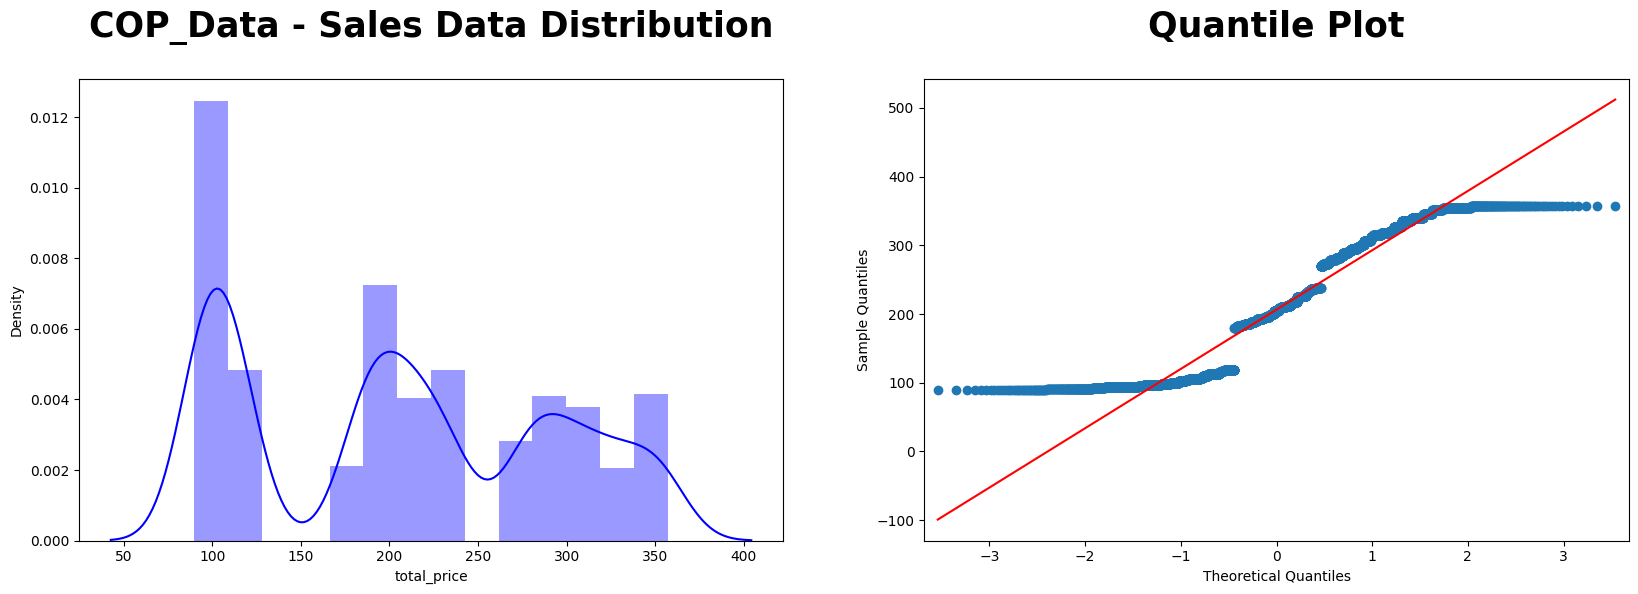

In [488]:
univariate_analysis(
    data=cop_data['total_price'],
    color='blue',
    title1="COP_Data - Sales Data Distribution",
    title2="Quantile Plot");

## Age

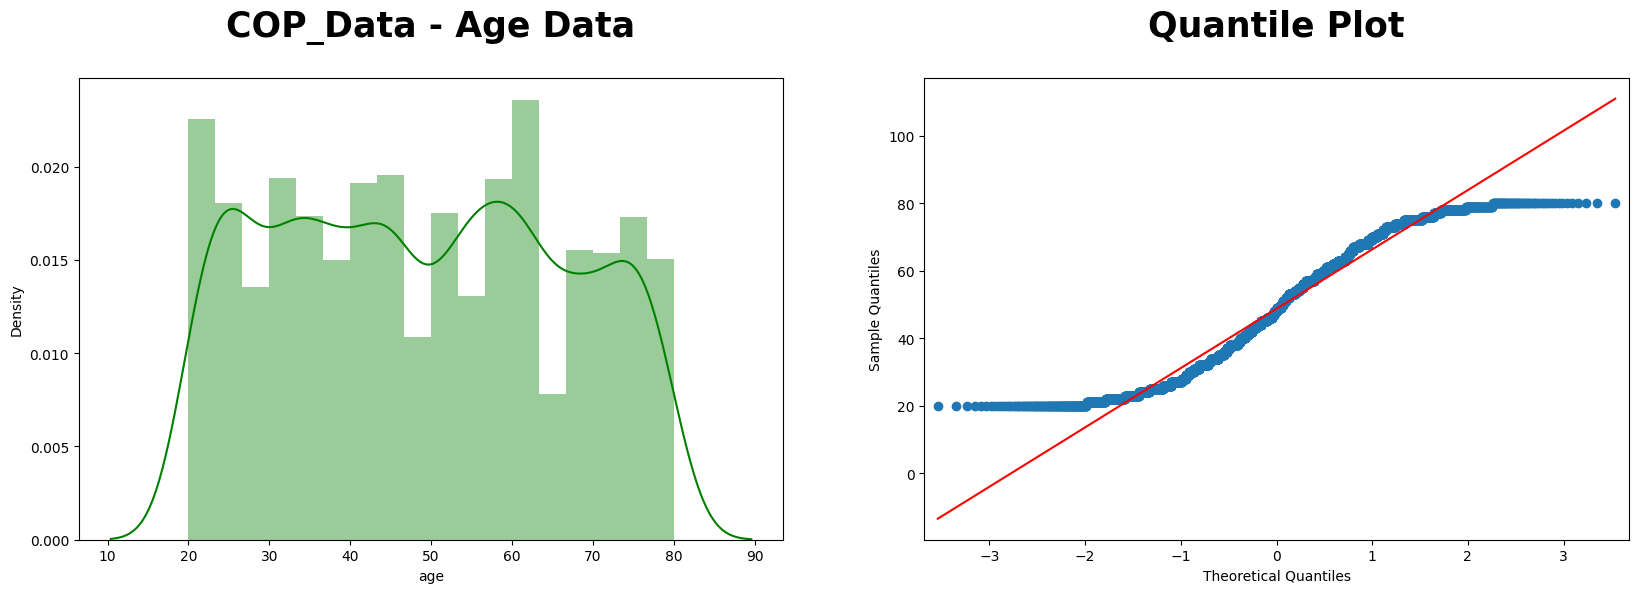

In [489]:
#Age data
univariate_analysis(
    data=cop_data['age'],
    color='green',
    title1="COP_Data - Age Data",
    title2="Quantile Plot"
);

## Price

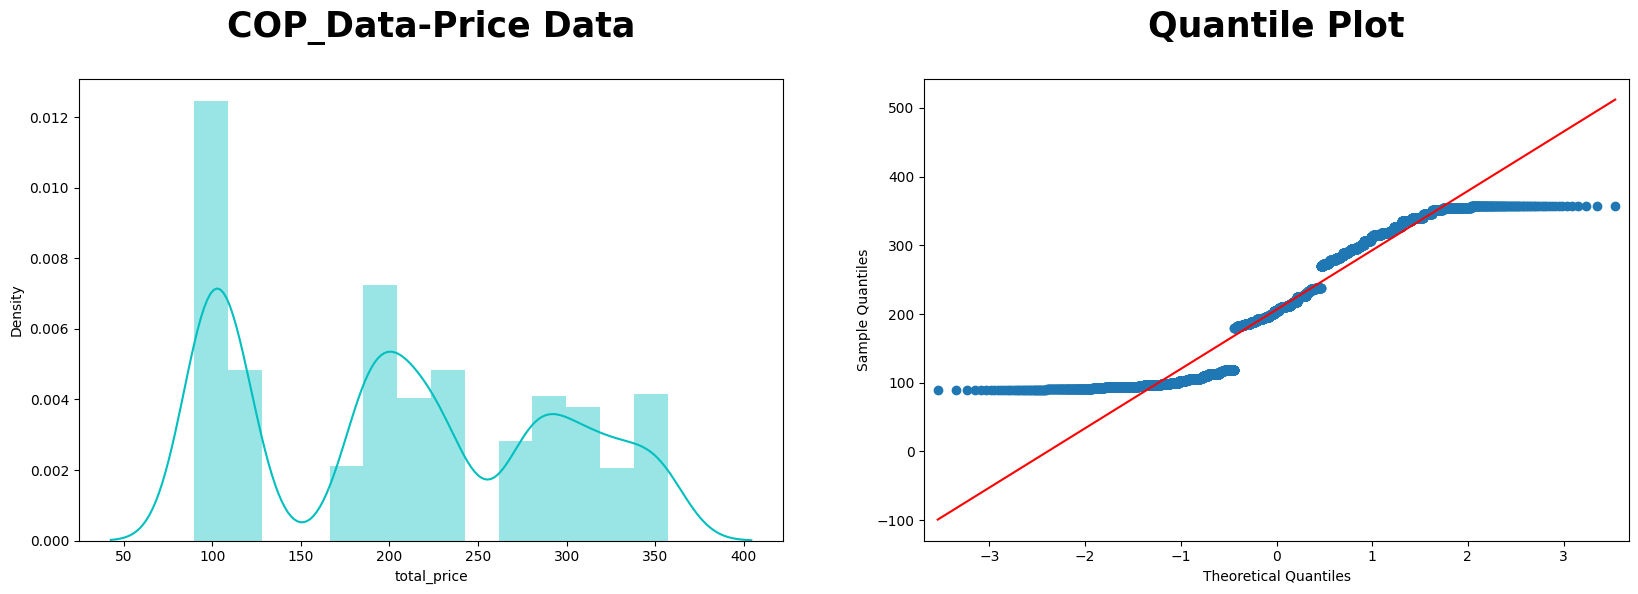

In [490]:
# price data
univariate_analysis(
    data=cop_data['total_price'],
    color='c',
    title1="COP_Data-Price Data",
    title2="Quantile Plot"
);

## Quantity

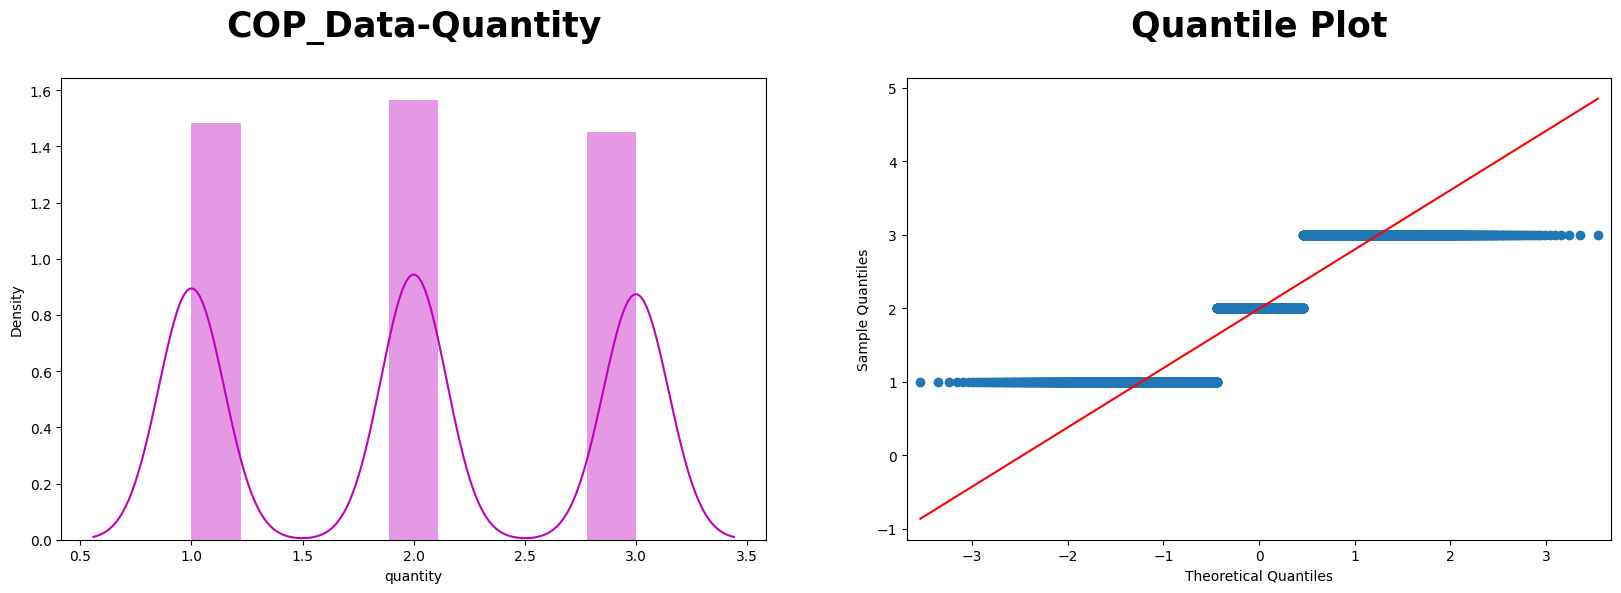

In [491]:
#Quantity data
univariate_analysis(
    data=cop_data['quantity'],
    color='m',
    title1="COP_Data-Quantity",
    title2="Quantile Plot"
);


## Price Per-Unit


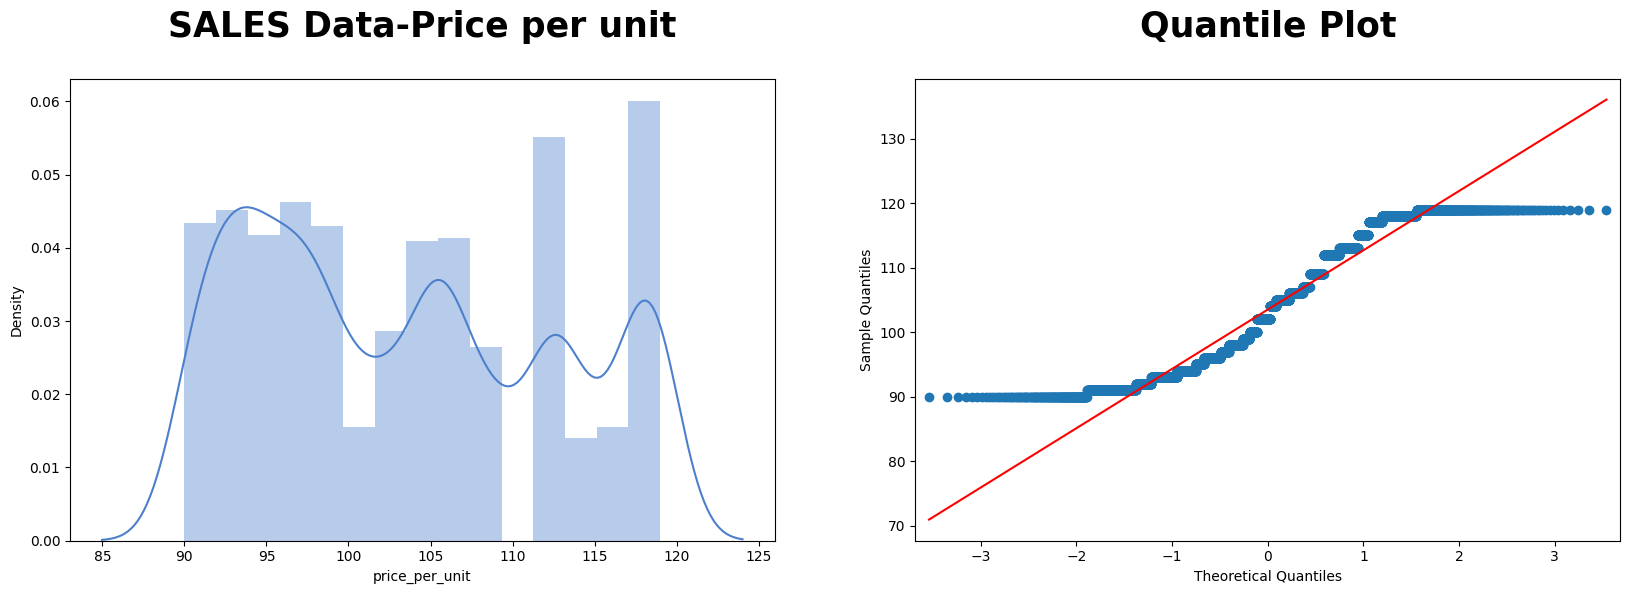

In [492]:
# Price per-unit
univariate_analysis(
    data=sales['price_per_unit'],
    color=(0.3,0.5,0.8),
    title1="SALES Data-Price per unit",
    title2="Quantile Plot"
);

## Total Price


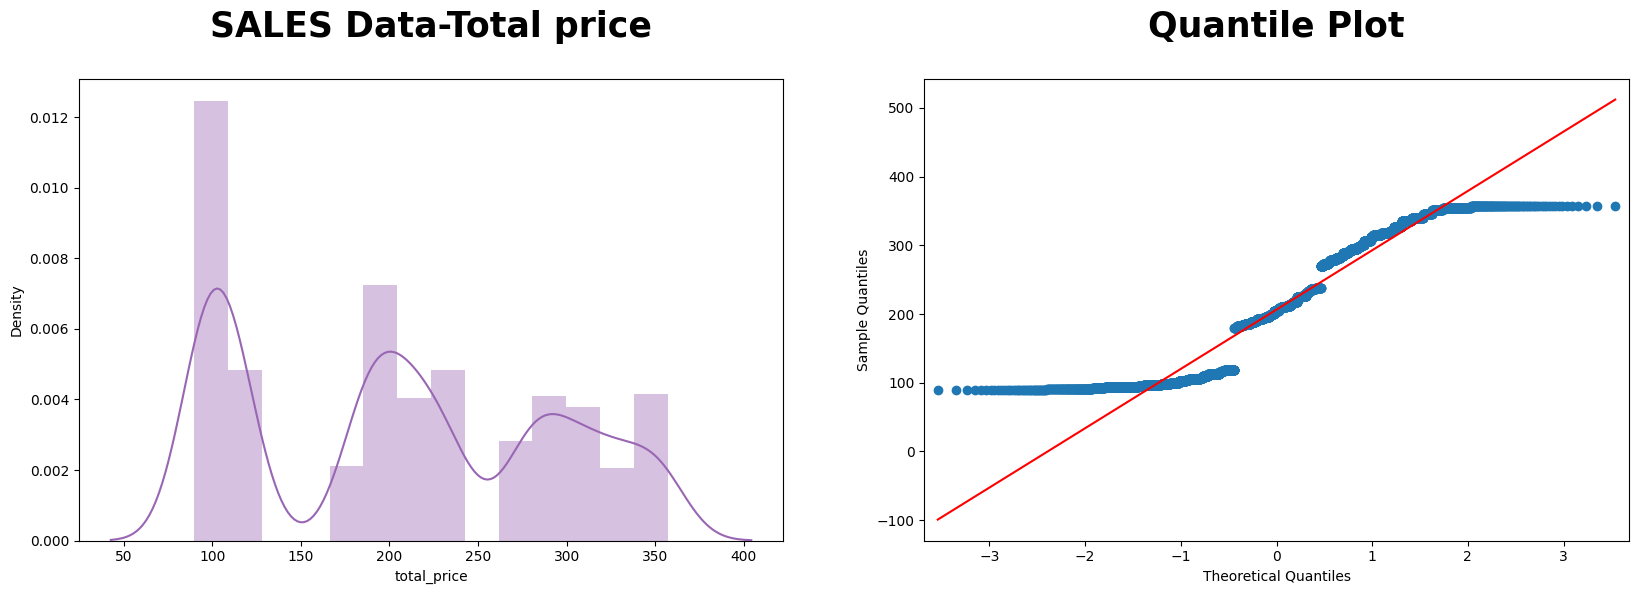

In [493]:
# Total Price
univariate_analysis(
    data=sales['total_price'],
    color=(0.6,0.4,0.7),
    title1="SALES Data-Total price",
    title2="Quantile Plot"
);

## Quantity

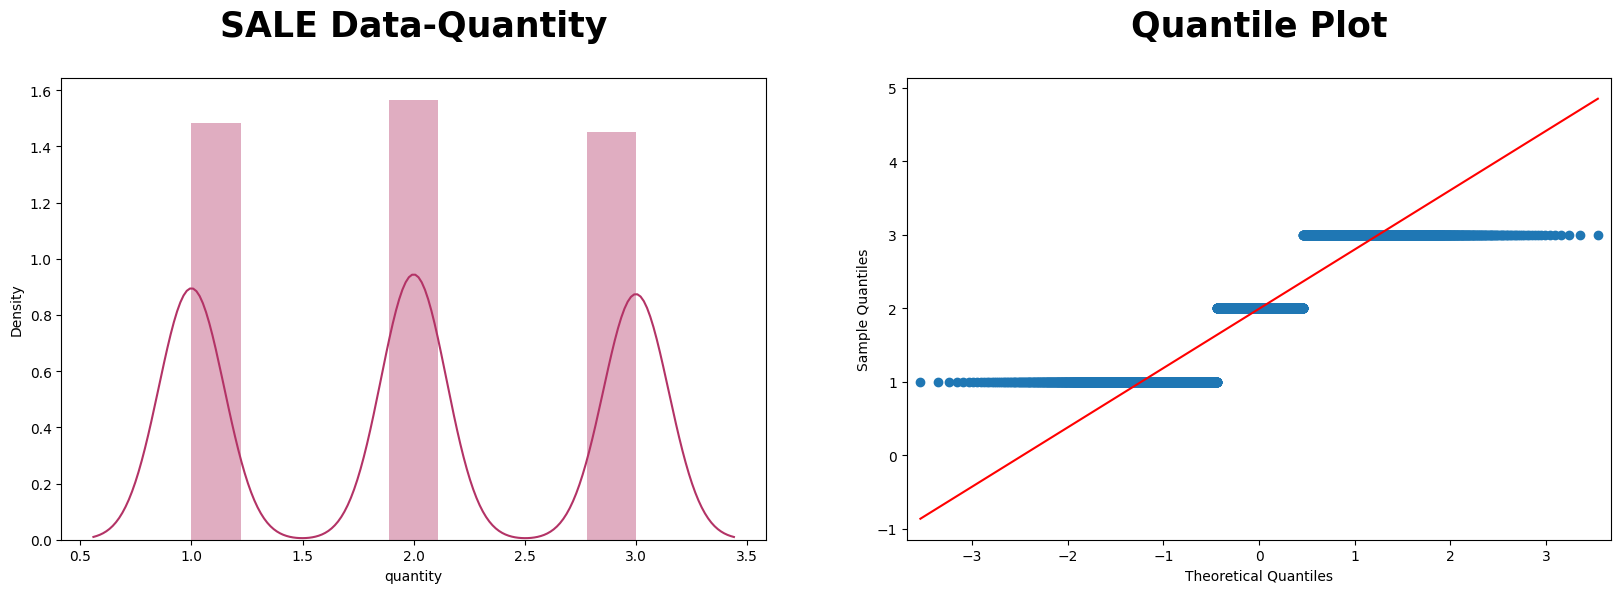

In [494]:
# Quantity
univariate_analysis(
    data=sales['quantity'],
    color=(0.7,0.2,0.4),
    title1="SALE Data-Quantity",
    title2="Quantile Plot"
);


## Sale Result Analysis

Gender Distribution

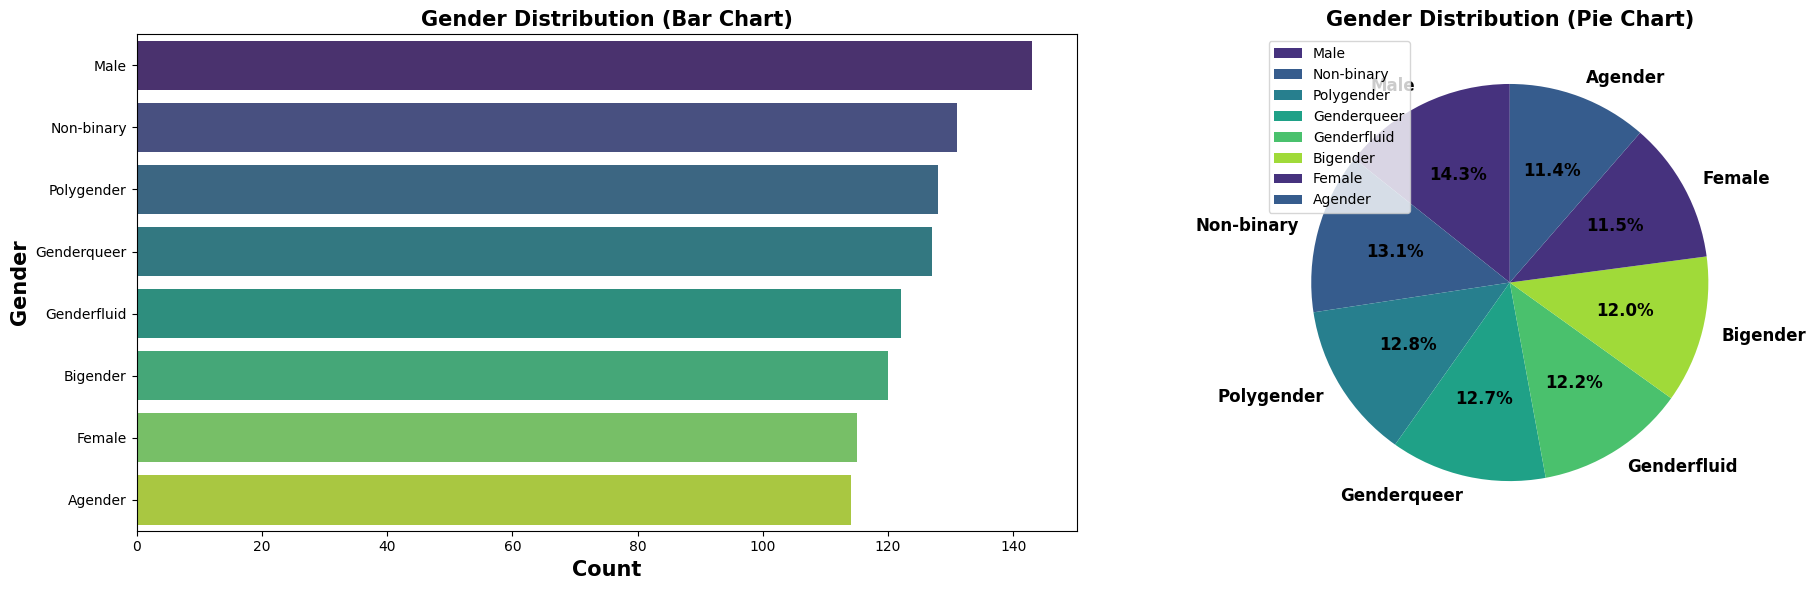

In [495]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    nrows=1,
    figsize=(20, 6)
)
gender_count = customers['gender'].value_counts().index
gender_value = customers['gender'].value_counts().values

# Bar chart
sns.barplot(
    x=gender_value,
    y=gender_count,
    palette='viridis',
    ax=ax1,
)
ax1.set_xlabel(
    "Count",
    fontsize=15,
    weight="bold"
)
ax1.set_ylabel(
    "Gender",
    fontsize=15,
    weight="bold"
)
ax1.set_title('Gender Distribution (Bar Chart)', fontsize=15, weight="bold")

# Pie chart
gender_counts = customers['gender'].value_counts()
ax2.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis'),
    textprops={'color': "black", 'fontsize': 12, 'weight': 'bold'}
)
ax2.set_title('Gender Distribution (Pie Chart)', fontsize=15, weight="bold")

# Add legend for the pie chart
ax2.legend(loc="best", labels=gender_counts.index)

# Adjust layout
plt.tight_layout()
plt.show()
   

Age Group Distribution

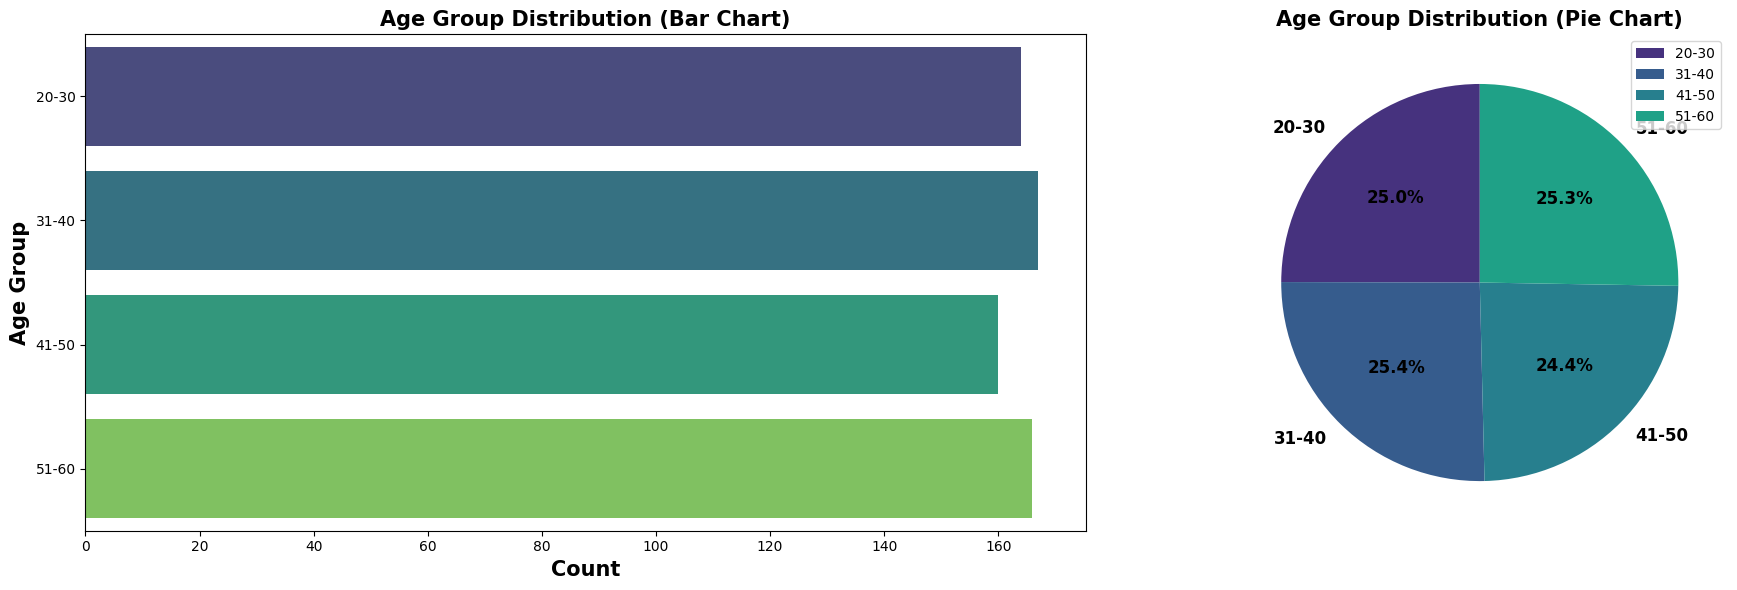

In [496]:
# Define bins for age groups
bins = [20, 30, 40, 50, 60]

# Create labels for the age groups
labels = ['20-30', '31-40', '41-50', '51-60']  # Adjust labels as per your bins

# Categorize ages into age groups
customers['age_group'] = pd.cut(customers['age'], bins=bins, labels=labels, right=False)

# Count the number of customers in each age group
age_group_counts = customers['age_group'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 6))

# Bar chart
sns.barplot(
    x=age_group_counts.values,
    y=age_group_counts.index,
    palette='viridis',
    ax=ax1
)
ax1.set_xlabel("Count", fontsize=15, weight="bold")
ax1.set_ylabel("Age Group", fontsize=15, weight="bold")
ax1.set_title('Age Group Distribution (Bar Chart)', fontsize=15, weight="bold")

# Pie chart
ax2.pie(
    age_group_counts,
    labels=age_group_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis'),
    textprops={'color': "black", 'fontsize': 12, 'weight': 'bold'}
)
ax2.set_title('Age Group Distribution (Pie Chart)', fontsize=15, weight="bold")
ax2.legend(loc="best", labels=age_group_counts.index)

plt.tight_layout()
plt.show()

The 5 best-selling products each month


In [497]:
# Group by month and product to count quantities sold
monthly_sales = cop_data.groupby(['order_month', 'product_id']).size().reset_index(name='quantity_sold')

# Find top 5 best-selling products for each month
top_5_products_each_month = monthly_sales.groupby('order_month').apply(lambda x: x.nlargest(5, 'quantity_sold')).reset_index(drop=True)

# Merge with product details
top_5_product_details = top_5_products_each_month.merge(products, left_on='product_id', right_on='product_ID')

# Select only the desired columns for the final output
final_output = top_5_product_details[['order_month', 'product_type','product_id', 'quantity_sold', 'product_name', 'size', 'colour', 'description']]

# Display the result
final_output

,order_month,product_type,product_id,quantity_sold,product_name,size,colour,description
0,1,Jacket,719,4,Trench Coat,XL,green,"A green coloured, XL sized, Trench Coat Jacket"
1,1,Trousers,1012,4,Wool,M,violet,"A violet coloured, M sized, Wool Trousers"
2,1,Trousers,1084,4,Joggers,XL,violet,"A violet coloured, XL sized, Joggers Trousers"
3,1,Trousers,1114,4,Cropped,XL,indigo,"A indigo coloured, XL sized, Cropped Trousers"
4,1,Shirt,21,3,Oxford Cloth,S,blue,"A blue coloured, S sized, Oxford Cloth Shirt"
5,2,Trousers,920,4,Drawstring,XS,yellow,"A yellow coloured, XS sized, Drawstring Trousers"
6,2,Shirt,409,3,Casual Slim Fit,XL,blue,"A blue coloured, XL sized, Casual Slim Fit Shirt"
7,7,Shirt,409,3,Casual Slim Fit,XL,blue,"A blue coloured, XL sized, Casual Slim Fit Shirt"
8,2,Jacket,507,3,Windbreaker,M,green,"A green coloured, M sized, Windbreaker Jacket"
9,2,Jacket,708,3,Trench Coat,L,orange,"A orange coloured, L sized, Trench Coat Jacket"


The revenue each month

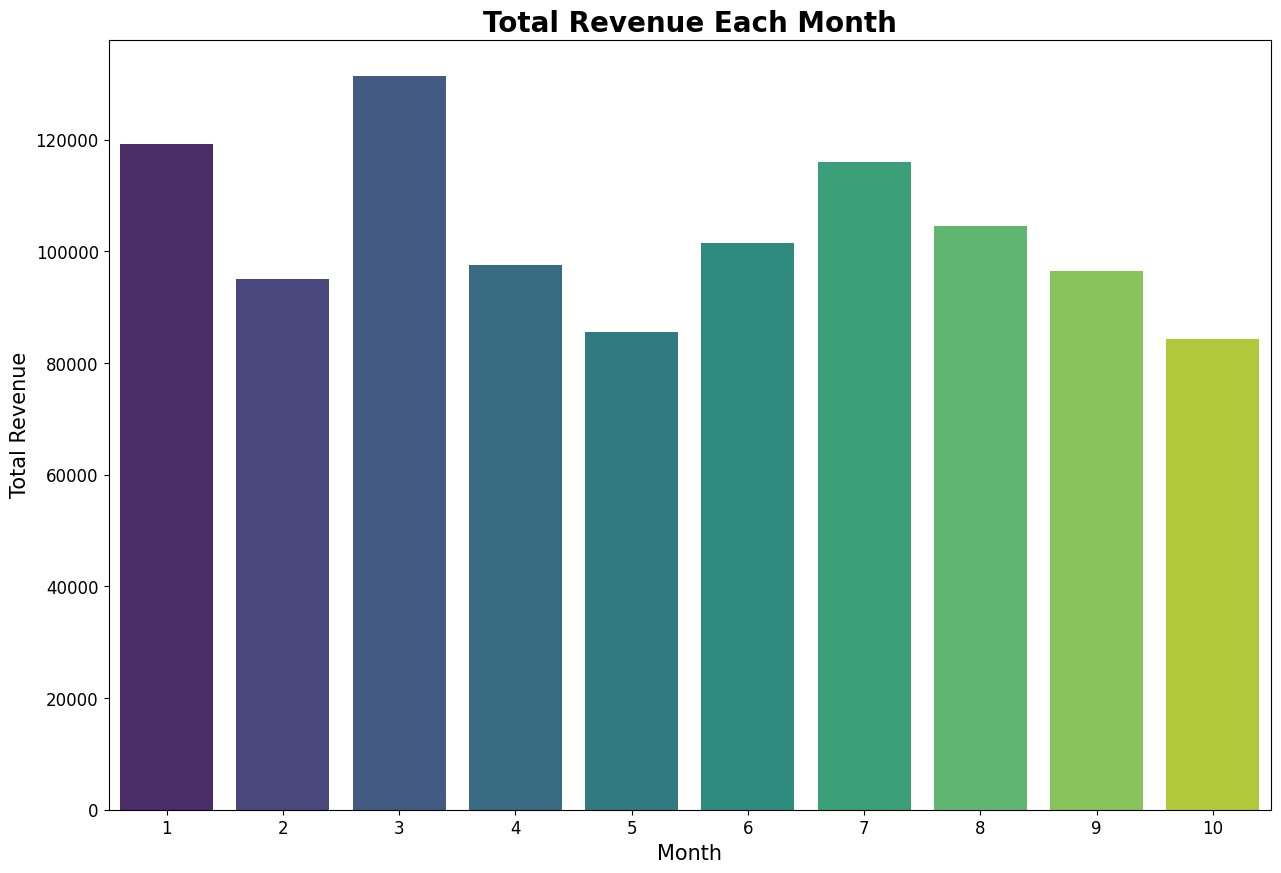

In [498]:
revuenue_each_month = cop_data.groupby('order_month')['total_price'].sum().reset_index(name='total_revenue')

# Plot the total revenue each month
plt.figure(figsize=(15, 10))
sns.barplot(x='order_month', y='total_revenue', data=revuenue_each_month, palette='viridis')
plt.title('Total Revenue Each Month', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Revenue', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Top 10 cities by total revenue

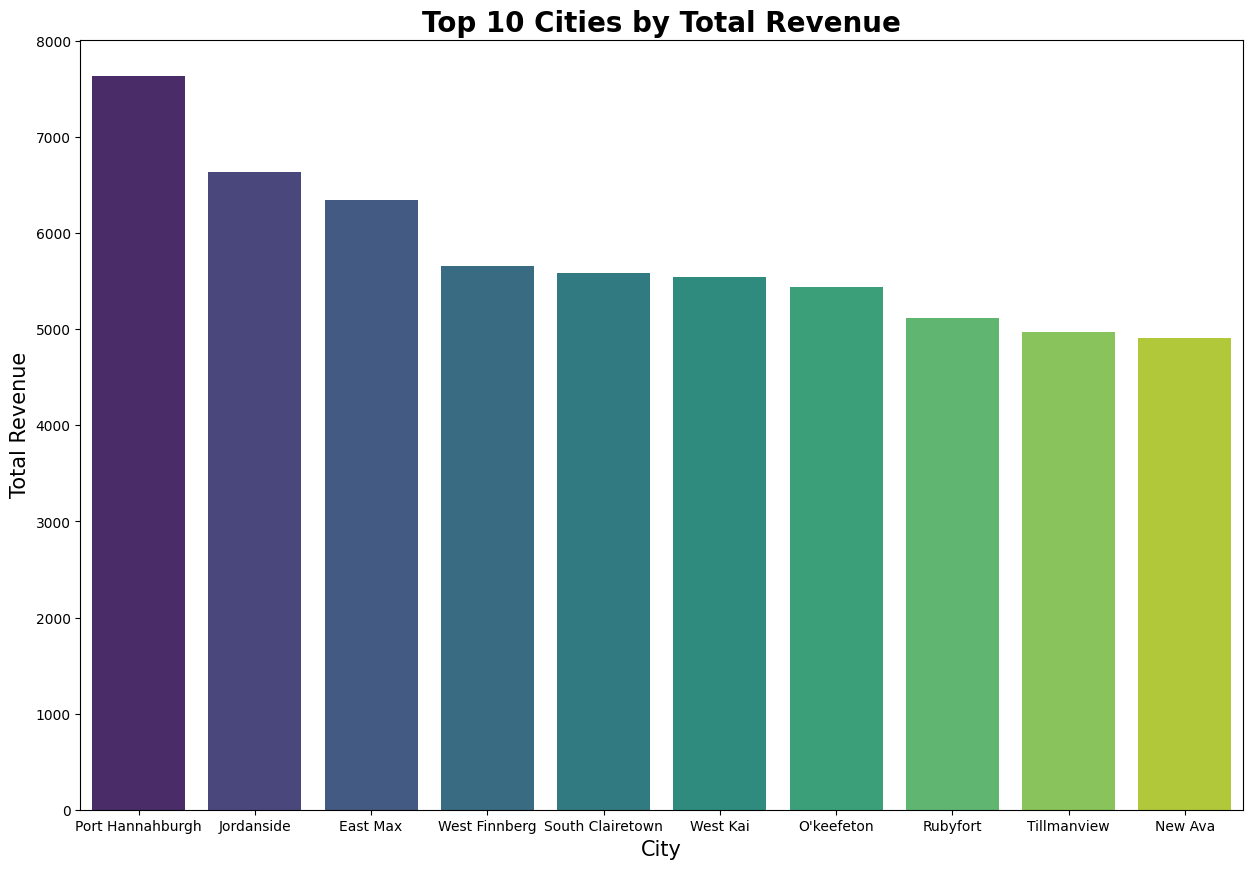

In [499]:
top_10_city=cop_data.groupby('city')['total_price'].sum().nlargest(10).reset_index(name='total_revenue')

#plot the top 10 cities by total revenue
plt.figure(figsize=(15, 10))
sns.barplot(x='city', y='total_revenue', data=top_10_city, palette='viridis')
plt.title('Top 10 Cities by Total Revenue', fontsize=20, weight='bold')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Revenue', fontsize=15)
plt.show()

Top 10 state by total revenue

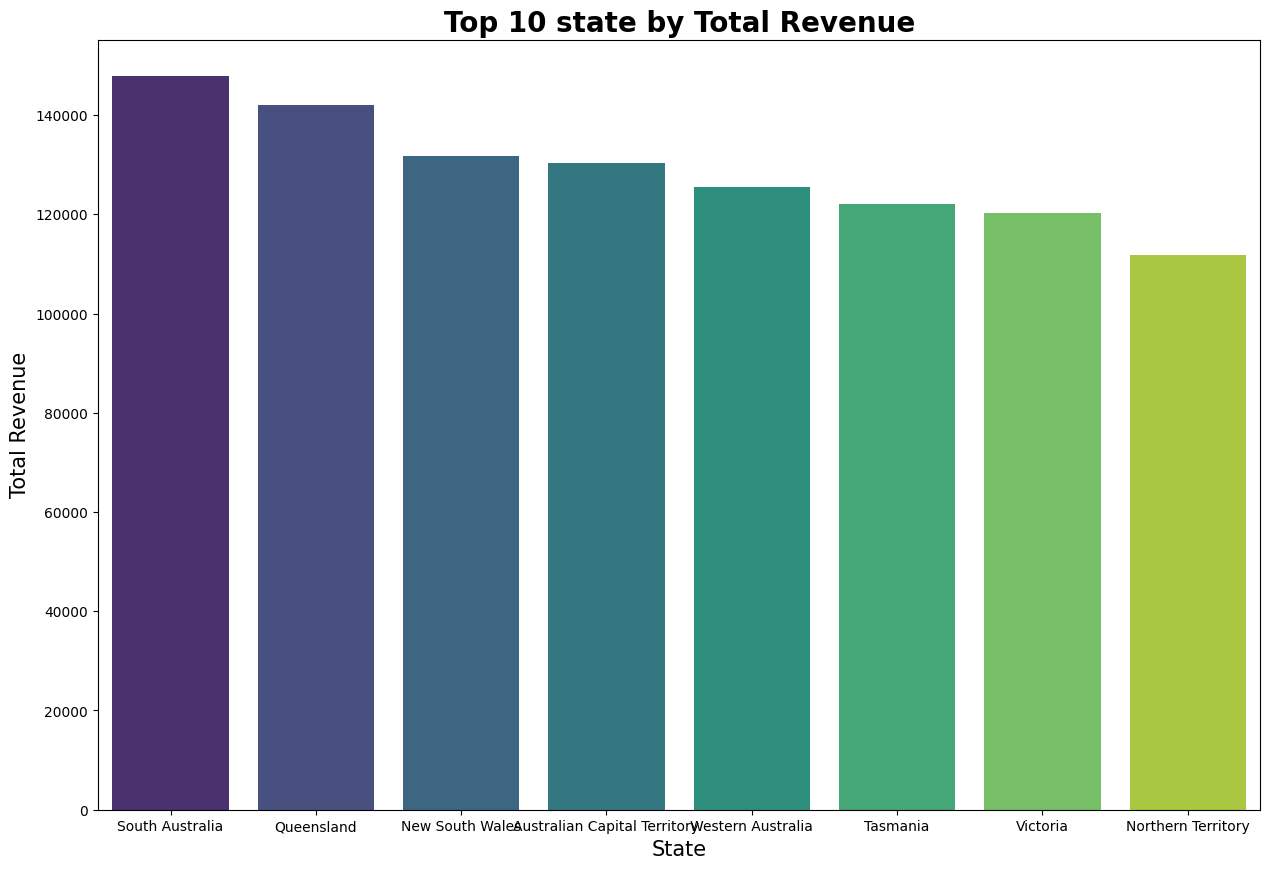

In [500]:
top_10_state=cop_data.groupby('state')['total_price'].sum().nlargest(10).reset_index(name='total_revenue')

#Plot the top 10 states by total revenue
plt.figure(figsize=(15, 10))
sns.barplot(x='state', y='total_revenue', data=top_10_state, palette='viridis')
plt.title('Top 10 state by Total Revenue', fontsize=20, weight='bold')
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Revenue', fontsize=15)
plt.show()

Inventory product

In [501]:
#Quantity sold of each product
inventory = cop_data.groupby('product_id').agg({
    'quantity': 'sum'
}).reset_index()
inventory=pd.DataFrame(inventory)
inventory

,product_id,quantity
0,1,12
1,2,11
2,3,6
3,4,16
4,5,3
...,...,...
1228,1255,10
1229,1256,6
1230,1257,6
1231,1258,7


In [502]:
# Rename product_id to product_ID
inventory.rename(columns={'product_id': 'product_ID'}, inplace=True)

# merge products and inventory
merged_df = pd.merge(products, inventory, on='product_ID', how='left')

# Calculate the inventory quantity
merged_df['inventory'] = merged_df['quantity_x'] - merged_df['quantity_y']

# top 10 products by inventory
top_10_products = merged_df.nlargest(10, 'inventory')
top_10_products[['product_ID', 'product_name', 'inventory', 'size', 'colour', 'description']]


,product_ID,product_name,inventory,size,colour,description
515,515,Windbreaker,78.0,XS,indigo,"A indigo coloured, XS sized, Windbreaker Jacket"
83,83,Flannel,77.0,L,yellow,"A yellow coloured, L sized, Flannel Shirt"
334,334,Mandarin Collar,77.0,XL,green,"A green coloured, XL sized, Mandarin Collar Shirt"
699,699,Parka,77.0,XL,violet,"A violet coloured, XL sized, Parka Jacket"
1136,1136,Cargo Pants,77.0,S,green,"A green coloured, S sized, Cargo Pants Trousers"
1151,1151,Cargo Pants,77.0,S,violet,"A violet coloured, S sized, Cargo Pants Trousers"
193,193,Camp Collared,76.0,L,green,"A green coloured, L sized, Camp Collared Shirt"
255,255,Polo,76.0,XS,yellow,"A yellow coloured, XS sized, Polo Shirt"
603,603,Cardigan,76.0,L,orange,"A orange coloured, L sized, Cardigan Jacket"
776,776,Pullover,76.0,S,orange,"A orange coloured, S sized, Pullover Jacket"
